In [1]:
from psychopy import visual, event, core
import math
import numpy as np
import pandas as pd
import random
import os
from psychopy.hardware import keyboard
from psychopy_visionscience.noise import NoiseStim
import glob
from PIL import Image
from psychopy import prefs
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

prefs.general['windowType'] ='pygame'
from memory_profiler import profile

from utils import scramble_image, logiF, inverse_logistic

['/opt/anaconda3/envs/preddibrain/lib/python39.zip', '/opt/anaconda3/envs/preddibrain/lib/python3.9', '/opt/anaconda3/envs/preddibrain/lib/python3.9/lib-dynload', '', '/opt/anaconda3/envs/preddibrain/lib/python3.9/site-packages', '/Users/barbaragrosjean/.psychopy3/packages/lib/python3.9/site-packages', '/Users/barbaragrosjean/.psychopy3/packages/include/python3.9', '/Users/barbaragrosjean/.psychopy3/packages', '/Users/barbaragrosjean/.psychopy3/packages/bin', '/Users/barbaragrosjean/.psychopy3/packages/include', '/Users/barbaragrosjean/.psychopy3/packages/lib', '/Users/barbaragrosjean/.psychopy3/packages/lib/python3.9/site-packages']


In [59]:
data_mid = pd.read_csv('mid_res_block0.csv')

In [60]:
def bais_mapping(x) : 
    if  x > 0.5:
        emo= 'happy'
    elif x == 0.5:
        emo = 'neutral'
    elif x < 0.5:
        emo = 'angry'
    else:
        emo = 'null'

    return emo


In [61]:
data_NC=pd.read_csv('/Users/barbaragrosjean/Desktop/CHUV/PreddiBrains/Output/Imaging/NC/PBNCBB1/NCI_BB1Block0.csv')

In [62]:
data_mid['em'] = data_mid.Bias.apply(lambda x : bais_mapping(x))
    
mapping_emotion = {1:'happy', 4:'angry'}
data_mid['PerceptC'] = data_mid.Emotion.map(mapping_emotion)
    

In [63]:
for i in range(len(data_mid)):
    if 4 == data_mid.loc[i, 'Seen'] and data_mid.loc[i, 'StimPresent'] == 1:
        data_mid.loc[i, 'CorrectSeen']= 0 
    elif  4 == data_mid.loc[i, 'Seen'] and data_mid.loc[i, 'StimPresent'] == 0:
        data_mid.loc[i, 'CorrectSeen']= -1 
    elif 1 == data_mid.loc[i, 'Seen'] and data_mid.loc[i, 'StimPresent'] == 0:
        data_mid.loc[i, 'CorrectSeen']= 0
    elif 1 == data_mid.loc[i, 'Seen'] and data_mid.loc[i, 'StimPresent'] == 1:
        data_mid.loc[i, 'CorrectSeen']= 1
    

In [67]:
gender = np.ones(len(data_mid.Seen.dropna()))

data_mid = pd.concat([data_mid, pd.Series(gender)], axis = 1).rename(columns = {0: 'gender'})
data_mid

,Unnamed: 0,StimOnset,Q1Onset,Seen,Resp1Onset,Q2Onset,Emotion,Resp2Onset,ConfQOnset,ConfROnset,...,Condition,StimPresent,Duration,Sname,StimID,em,PerceptC,CorrectSeen,gender,gender
0,0,9.883552,15.991424,1.0,37.045737,39.064688,1.0,75.195055,77.22082096300073,78.87311456200041,...,0.0,1.0,0.016,H80A20,/Users/barbaragrosjean/Desktop/CHUV/PreddiBrai...,happy,happy,1.0,1.0,1.0
1,1,84.492718,90.602333,1.0,100.461795,102.480499,1.0,108.130156,Not asked,Not asked,...,0.0,0.0,0.016,NaN,NaN,null,happy,0.0,1.0,1.0
2,2,115.780437,122.474828,1.0,135.940731,137.960226,1.0,139.793765,141.80416868999964,144.797674843001,...,1.0,1.0,0.200,H30A70,/Users/barbaragrosjean/Desktop/CHUV/PreddiBrai...,angry,happy,1.0,1.0,1.0
3,3,150.430867,156.544635,1.0,157.760627,159.771928,1.0,161.181189,163.1920609560002,166.13312589400084,...,0.0,1.0,0.016,H20A80,/Users/barbaragrosjean/Desktop/CHUV/PreddiBrai...,angry,happy,1.0,1.0,1.0
4,4,171.764611,178.468535,1.0,179.610027,181.621897,1.0,188.956383,Not asked,Not asked,...,1.0,1.0,0.200,H20A80,/Users/barbaragrosjean/Desktop/CHUV/PreddiBrai...,angry,happy,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.200,NaN,NaN,null,NaN,NaN,NaN,NaN
98,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.200,NaN,NaN,null,NaN,NaN,NaN,NaN
99,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.200,NaN,NaN,null,NaN,NaN,NaN,NaN
100,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.016,NaN,NaN,null,NaN,NaN,NaN,NaN


In [65]:
data_mid.loc[:len(gender)-1, :]

,Unnamed: 0,StimOnset,Q1Onset,Seen,Resp1Onset,Q2Onset,Emotion,Resp2Onset,ConfQOnset,ConfROnset,...,ConfRating,Bias,Condition,StimPresent,Duration,Sname,StimID,em,PerceptC,CorrectSeen
0,0,9.883552,15.991424,1.0,37.045737,39.064688,1.0,75.195055,77.22082096300073,78.87311456200041,...,5,0.8,0.0,1.0,0.016,H80A20,/Users/barbaragrosjean/Desktop/CHUV/PreddiBrai...,happy,happy,1.0
1,1,84.492718,90.602333,1.0,100.461795,102.480499,1.0,108.130156,Not asked,Not asked,...,Not asked,NaN,0.0,0.0,0.016,NaN,NaN,null,happy,0.0
2,2,115.780437,122.474828,1.0,135.940731,137.960226,1.0,139.793765,141.80416868999964,144.797674843001,...,3,0.3,1.0,1.0,0.200,H30A70,/Users/barbaragrosjean/Desktop/CHUV/PreddiBrai...,angry,happy,1.0
3,3,150.430867,156.544635,1.0,157.760627,159.771928,1.0,161.181189,163.1920609560002,166.13312589400084,...,9,0.2,0.0,1.0,0.016,H20A80,/Users/barbaragrosjean/Desktop/CHUV/PreddiBrai...,angry,happy,1.0
4,4,171.764611,178.468535,1.0,179.610027,181.621897,1.0,188.956383,Not asked,Not asked,...,Not asked,0.2,1.0,1.0,0.200,H20A80,/Users/barbaragrosjean/Desktop/CHUV/PreddiBrai...,angry,happy,1.0
5,5,196.603319,202.717179,1.0,206.103313,208.118231,1.0,214.732326,216.75011172500126,219.01622067300013,...,9,0.4,0.0,1.0,0.016,H40A60,/Users/barbaragrosjean/Desktop/CHUV/PreddiBrai...,angry,happy,1.0
6,6,224.652979,231.355126,1.0,232.653534,234.665064,1.0,237.047353,239.05782521000037,240.7034849339998,...,8,0.4,1.0,1.0,0.200,H40A60,/Users/barbaragrosjean/Desktop/CHUV/PreddiBrai...,angry,happy,1.0
7,7,246.346397,252.457614,1.0,253.369513,255.381480,4.0,259.301714,Not asked,Not asked,...,Not asked,0.3,0.0,1.0,0.016,H30A70,/Users/barbaragrosjean/Desktop/CHUV/PreddiBrai...,angry,angry,1.0
8,8,266.941538,273.052829,1.0,274.678122,276.690461,1.0,282.272829,Not asked,Not asked,...,Not asked,0.4,0.0,1.0,0.016,H40A60,/Users/barbaragrosjean/Desktop/CHUV/PreddiBrai...,angry,happy,1.0
9,9,289.922349,296.032423,1.0,300.427875,302.442205,1.0,303.695101,305.70341511300103,307.9281742380008,...,6,0.6,0.0,1.0,0.016,H60A40,/Users/barbaragrosjean/Desktop/CHUV/PreddiBrai...,happy,happy,1.0


In [4]:
#### SETTING ####

MR_settings = { 
    'TR': 2.4, # duration (sec) per volume CHECK
    'volumes': 375, # number of whole-brain 3D volumes / frames
    'sync': '5', # character to use as the sync timing event; assumed to come at start of a volume
    'skip': 0, # number of volumes lacking a sync pulse at start of scan (dummies)
    'sound': True    # in test mode: play a tone as a reminder of scanner noise
    }

path = '/Users/barbaragrosjean/Desktop/CHUV/PreddiBrains/'

stimPath = path + 'Stimuli/Faces' 
mStimPath = path + 'Stimuli/Faces/Males' 
fStimPath = path + 'Stimuli/Faces/Females' 
outPath = path + 'Output/Imaging/FA'

In [5]:
# Set the subject 
subjNum = input("Enter main participant identifier: ") 
subjPath = os.path.join(outPath, 'PBF' + subjNum)
os.chdir(subjPath)
resFile = 'FaceI_' + subjNum + '.csv'
while os.path.isfile(os.path.join(subjPath, resFile)):
    print("Error! This subject file exists already.")
    subjNum  = input("Please re-enter main participant identifier: ")    
    print(subjNum)

subjData = pd.read_csv('PBF'+subjNum +'_IntakeData.csv').drop(columns = 'Unnamed: 0')
lang = subjData.iloc[5,0]

In [6]:
subjData

,0
0,2025-04-22 13:12:50.145692
1,PBFBGG
2,2001-04-21
3,24.003230730268246
4,F
5,E
6,/Users/barbaragrosjean/Desktop/CHUV/PreddiBrai...


In [7]:
# Set the display parameters
width_norm = 1.6  # corresponds to 16:10 aspect
height_norm = 1.0

# Create window with norm units
win = visual.Window([1920, 1080], [0, 0], units="norm", fullscr=False) #FCBG 

# Get actual window size in pixels
win_width, win_height = win.size
win_aspect = win_width / win_height

# Your image size in pixels
img_width = 736
img_height = 1080
img_aspect = img_width / img_height

# Decide how tall (in norm units) the image should appear (max = 2 vertically)
norm_height = 1.5  # fill most of vertical space, but leave margins
norm_width = norm_height * img_aspect / win_aspect

# Use this size for all your ImageStims
norm_image_size = [norm_width, norm_height]


2025-04-24 14:06:37.693 python[15842:535601] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-24 14:06:37.693 python[15842:535601] +[IMKInputSession subclass]: chose IMKInputSession_Modern
2025-04-24 14:06:37.737 python[15842:535601] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fcdc266b660>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2025-04-24 14:06:37.737 python[15842:535601] Warning: Expected min height of view: (<NSButton: 0x7fcdc26c7e50>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2025-04-24 14:06:37.738 python[15842:535601] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fcdd1cb75f0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2025-04-24 14:06:37.739 python[15842:535601] Warning: Expected min height of view: (

In [8]:
n1 = []
n2 = []

for nn in range(1152):
    n1.append(NoiseStim(
    win=win, name='noise', units='pix',
    mask=None, ori=0.0, pos=(0, 0), size=(736, 1080),
    opacity=1, blendmode='avg', contrast=1.7,
    texRes=512, noiseType='Binary', noiseElementSize=7,  # Adjusted size
    noiseBaseSf=8.0/512, noiseFilterLower=3/512, noiseFilterUpper=8.0/512.0,
    interpolate=False, depth=-1.0
))

for nnn in range(1152):
    n2.append(NoiseStim(
    win=win, name='noise', units='pix',
    mask=None, ori=0.0, pos=(0, 0), size=(736, 1080),
    opacity=1, blendmode='avg', contrast=1.7,
    texRes=512, noiseType='Uniform', noiseElementSize=14,  # Adjusted size
    noiseBaseSf=8.0/512, noiseFilterLower=3/512, noiseFilterUpper=8.0/512.0,
    interpolate=False, depth=-1.0))

noise= n1+n2

In [9]:
### Define the Stimulis
p = []
g = []
r = []
stims = []
percept = []

genders = ['Males', 'Females']
whichG = np.random.choice(genders, 1)[0]
genderpath = stimPath + '/' + whichG
os.chdir(genderpath)
Imgs = glob.glob(f'*{whichG[:1]}*.png') 

Ids = []
for i in Imgs:
        isp = i.split('_')
        Ids.append(isp[0]) 

uIds = list(set(Ids)) 
sIds = random.sample(uIds,1) # Took only 1 randomly

for i in Imgs:
        if sIds[0] in i:
            thisIm = os.path.join(genderpath, i)
            stims.append(thisIm)

accept= ['H30','H60', 'H80', 'H50', 'H20', 'H40', 'H70']
stims = [i for i in stims if any(allow in i for allow in accept)]

In [10]:
# Define stimulus list (lenght 42)
stimAll = [] 
stimScr = [] 
sName = [] 
imIDs = []

for r in range(6):
    for s in stims:
        img_color = Image.open(s)
        img_grey = img_color.convert('L')
        scrambled_image = scramble_image(img_grey)
        stimScr.append(visual.ImageStim(win, image=scrambled_image, pos = [0,0], size=norm_image_size, opacity = 0.5))
        stimAll.append(visual.ImageStim(win, image=img_grey, pos = [0,0], size=norm_image_size))
        sName.append(s.split('_')[1][:-4])
        imIDs.append(s)
        

In [11]:
# Define Percept 
percept = []    
for m in stims:
    if 'M' in m:
        g.append(1)
    else:
        g.append(0)
    if 'A100' in m:
        continue
    elif 'H100' in m:
        continue
    elif 'H80' in m:
        p.append(0.8)
        percept.append('H')
    elif 'H70' in m:
        p.append(0.7)
        percept.append('A')
    elif 'H60' in m:
        p.append(0.6)
        percept.append('H')
    elif 'H50' in m:
        p.append(0.5)
        percept.append('N')
    elif 'H40' in m:
        p.append(0.4)
        percept.append('A')
    elif 'H30' in m:
        p.append(0.3)
        percept.append('A')
    elif 'H20' in m:
        p.append(0.2)
        percept.append('A')

In [12]:
dur = np.hstack([np.tile(0.200, 51), np.tile(0.016, 51)])


In [13]:
# set up conditions 
condC = np.hstack([np.ones(51), np.zeros(51)])
condP = np.hstack([np.ones(84), np.zeros(18)])

In [14]:
sNames = sName + sName + list(np.tile(np.nan, 18)) # instead of nan put 0 ? 
imIDs = imIDs + imIDs + list(np.tile(np.nan, 18))
allStims = stimAll + stimAll + list(np.tile(np.nan, 18))
allStimscr = stimScr + stimScr + list(random.sample(stimScr, 18))

p = p * 12 + list(np.tile(np.nan, 18))
g = g * 12 + list(np.tile(np.nan, 18))
percept = percept * 12 + list(np.tile(np.nan, 18))

In [15]:
p = p * 12 + list(np.tile(np.nan, 18))
g = g * 12 + list(np.tile(np.nan, 18))
percept = percept * 12 + list(np.tile(np.nan, 18))

In [16]:
# randomize 
seed = random.randint(1,5)
random.Random(seed).shuffle(p)
random.Random(seed).shuffle(g)
random.Random(seed).shuffle(percept)
random.Random(seed).shuffle(allStims)
random.Random(seed).shuffle(allStimscr)
random.Random(seed).shuffle(condP)
random.Random(seed).shuffle(sNames)
random.Random(seed).shuffle(imIDs)

random.Random(9).shuffle(condC)
random.Random(9).shuffle(dur)
random.Random(8).shuffle(noise)

In [17]:
#### Confidence Bar 
confScale = visual.Slider(win,
    ticks=list(range(1, 11)),             # `low=1, high=10` -> ticks from 1 to 10
    labels=None,                           # No specific labels
    startValue=random.randint(1, 10),      # `markerStart`
    granularity=1,                         # Ensures only integer values (discrete steps)
    color='black',                     # `textColor`
    pos= (0, -0.3), markerColor='Black')

# Set up custom key responses for moving the marker and accepting the response
cleftKeys = '1'
crightKeys = '4'
cacceptKeys = ['2', '3']

# Determine which trials to ask the confidence question
n_trials = len(condC)

# Get indices where condP == 1 and split by condC
condP1_indices = [i for i in range(n_trials) if condP[i] == 1]
condP1_C0 = [i for i in condP1_indices if condC[i] == 0]
condP1_C1 = [i for i in condP1_indices if condC[i] == 1]

# Total confidence questions to ask: half of all condP == 1 trials
n_conf_total = len(condP1_indices) // 2
n_each = n_conf_total // 2

# Randomly sample trials from each condC group
random.seed(42)
ask_conf_trials_C0 = random.sample(condP1_C0, n_each)
ask_conf_trials_C1 = random.sample(condP1_C1, n_each)

# Build ask_conf list
ask_conf = [False] * n_trials
for idx in ask_conf_trials_C0 + ask_conf_trials_C1:
    ask_conf[idx] = True


In [18]:
# to store 
response1 = []
response2 = []

dused = []
nused = []
nsize = []
val = []
condition = []
present = []
bias = []
gender = []
Percepts = []
Id = []


stimPres = []
q1Pres = []
r1Ons = []
r1RT = []
q2Pres = []
r2Ons = []
r2RT = []
confQOns = []
confROns = []
confRating = []
confRT = []

In [19]:
# Set Text 
if lang == 'E':      
    instrText = visual.TextStim(win, text = 'In this task, you will be presented with a series of noise masks. In between the noise masks, we may show you an image of a face. We will then ask you if you saw a face. If yes, press the rightmost button. If no, press the leftmost button. You will then be asked if the face you saw was happy (press right), or angry(press left). You must provide an answer even if you did not see the face. You will then be asked how sure you are of your response on a scale from 1-10. Navigate through the scale with left and right buttons, and confirm your selection with either of the two middle buttons. Press any key to continue.', 
    font='', pos=(0, 0), depth=0, rgb=None, color= 'black', colorSpace='rgb', opacity=1.0, contrast=1.0, units='', 
    ori=0.0, height = 0.07, antialias=True, bold=False, italic=False,  anchorVert='center', anchorHoriz='center',
    fontFiles=(), wrapWidth=None, flipHoriz=False, flipVert=False, languageStyle='LTR', name=None, autoLog=None)  
    
    Quest1 = visual.TextStim(win, text = 'Did you see a face?', 
    font='', pos=(0, 0), depth=0, rgb=None, color= 'black', colorSpace='rgb', opacity=1.0, contrast=1.0, units='', 
    ori=0.0, height = 0.07, antialias=True, bold=False, italic=False,  anchorVert='center', anchorHoriz='center',
    fontFiles=(), wrapWidth=None, flipHoriz=False, flipVert=False, languageStyle='LTR', name=None, autoLog=None)  
    
    Quest2 = visual.TextStim(win, text = 'Angry or happy?', 
    font='', pos=(0, 0), depth=0, rgb=None, color= 'black', colorSpace='rgb', opacity=1.0, contrast=1.0, units='', 
    ori=0.0, height = 0.07, antialias=True, bold=False, italic=False, anchorVert='center', anchorHoriz='center',
    fontFiles=(), wrapWidth=None, flipHoriz=False, flipVert=False, languageStyle='LTR', name=None, autoLog=None)  
    
    thanksText = visual.TextStim(win=win, text='Thank you', font='', pos=(0, 0),
    depth=0, rgb=None, color='black', colorSpace='rgb', opacity=1.0, contrast=1.0, units='', 
    ori=0.0, height = 0.07, antialias=True, bold=True, italic=False, alignHoriz='center', alignVert='center',
    fontFiles=(), wrapWidth=None, flipHoriz=False, flipVert=False, languageStyle='LTR', name=None, autoLog=None)
    
    confQuestion= visual.TextStim(win, text = 'How sure are you of your last answer?', 
    font='', pos=(0, 0.4), depth=0, rgb=None, color= 'black', colorSpace='rgb', opacity=1.0, contrast=1.0, units='', 
    ori=0.0, height=0.07, antialias=True, bold=False, italic=False, alignHoriz='center', alignVert='center',
    fontFiles=(), wrapWidth=None, flipHoriz=False, flipVert=False, languageStyle='LTR', name=None, autoLog=None) 
    
    startText = visual.TextStim(win=win, text='Press any key to begin', font='', pos=(0, 0),
    depth=0, rgb=None, color='black', colorSpace='rgb', opacity=1.0, contrast=1.0, units='', 
    ori=0.0, height = 0.07, antialias=True, bold=True, italic=False,  anchorVert='center', anchorHoriz='center',
    fontFiles=(), wrapWidth=None, flipHoriz=False, flipVert=False, languageStyle='LTR', name=None, autoLog=None)

    scannerWait = visual.TextStim(win, text = 'Please wait for scanner...', 
    font='', pos=(0, 0), depth=0, rgb=None, color= 'black', colorSpace='rgb', opacity=1.0, contrast=1.0, units='', 
    ori=0.0, height=0.07, antialias=True, bold=False, italic=False, alignHoriz='center', alignVert='center',
    fontFiles=(), wrapWidth=None, flipHoriz=False, flipVert=False, languageStyle='LTR', name=None, autoLog=None)  

    
elif lang == 'F':
    instrText = visual.TextStim(win, text = "Dans cette tâche, vous verrez une série de masques bruités. Entre ces masques, nous pourrons vous présenter un visage. Nous vous demanderons ensuite si vous avez vu un visgae. Si oui, appuyez sur le bouton le plus à droite. Si non, appuyez sur le bouton le plus à gauche. Ensuite, nous vous demanderons si le visage etait heureux (appuyez à droite) ou fâché (appuyez à gauche). Vous devez fournir une réponse, même si vous n’avez pas vu le visage. Enfin, nous vous demanderons à quel point vous êtes sûr(e) de votre dernière réponse sur une échelle de 1 à 10. Naviguez l’échelle avec les boutons gauche et droite, puis  valider votre sélection avec l’un des boutons du milieu. Appuyez sur une touche pour continuer.", 
    font='', pos=(0, 0), depth=0, rgb=None, color= 'black', colorSpace='rgb', opacity=1.0, contrast=1.0, units='', 
    ori=0.0, height = 0.07, antialias=True, bold=False, italic=False,  anchorVert='center', anchorHoriz='center',
    fontFiles=(), wrapWidth=None, flipHoriz=False, flipVert=False, languageStyle='LTR', name=None, autoLog=None)  

    
    Quest1 = visual.TextStim(win, text = 'Avez-vous vu un visage?', 
    font='', pos=(0, 0), depth=0, rgb=None, color= 'black', colorSpace='rgb', opacity=1.0, contrast=1.0, units='', 
    ori=0.0, height = 0.07, antialias=True, bold=False, italic=False,  anchorVert='center', anchorHoriz='center',
    fontFiles=(), wrapWidth=None, flipHoriz=False, flipVert=False, languageStyle='LTR', name=None, autoLog=None)  
    
    Quest2 = visual.TextStim(win, text = 'Faché ou heureux?', 
    font='', pos=(0, 0), depth=0, rgb=None, color= 'black', colorSpace='rgb', opacity=1.0, contrast=1.0, units='', 
    ori=0.0, height = 0.07, antialias=True, bold=False, italic=False, anchorVert='center', anchorHoriz='center',
    fontFiles=(), wrapWidth=None, flipHoriz=False, flipVert=False, languageStyle='LTR', name=None, autoLog=None)  
    
    thanksText = visual.TextStim(win=win, text='Merci', font='', pos=(0, 0),
    depth=0, rgb=None, color='black', colorSpace='rgb', opacity=1.0, contrast=1.0, units='', 
    ori=0.0, height = 0.07, antialias=True, bold=True, italic=False, alignHoriz='center', alignVert='center',
    fontFiles=(), wrapWidth=None, flipHoriz=False, flipVert=False, languageStyle='LTR', name=None, autoLog=None)
    
    confQuestion= visual.TextStim(win, text = 'A quel degré êtes-vous sur de votre dernière réponse?', 
    font='', pos=(0, 0.4), depth=0, rgb=None, color= 'black', colorSpace='rgb', opacity=1.0, contrast=1.0, units='', 
    ori=0.0, height=0.07, antialias=True, bold=False, italic=False, alignHoriz='center', alignVert='center',
    fontFiles=(), wrapWidth=None, flipHoriz=False, flipVert=False, languageStyle='LTR', name=None, autoLog=None) 
    
    startText = visual.TextStim(win=win, text='Appuyez sur un bouton pour commencer', font='', pos=(0, 0),
    depth=0, rgb=None, color='black', colorSpace='rgb', opacity=1.0, contrast=1.0, units='', 
    ori=0.0, height = 0.07, antialias=True, bold=True, italic=False,  anchorVert='center', anchorHoriz='center',
    fontFiles=(), wrapWidth=None, flipHoriz=False, flipVert=False, languageStyle='LTR', name=None, autoLog=None)

    scannerWait = visual.TextStim(win, text = 'S il vous plait, attendez pour le scanner ...', 
    font='', pos=(0, 0), depth=0, rgb=None, color= 'black', colorSpace='rgb', opacity=1.0, contrast=1.0, units='', 
    ori=0.0, height=0.07, antialias=True, bold=False, italic=False, alignHoriz='center', alignVert='center',
    fontFiles=(), wrapWidth=None, flipHoriz=False, flipVert=False, languageStyle='LTR', name=None, autoLog=None)  

FixationText = visual.TextStim(win=win, text='+', font='', pos=(0, 0),
depth=0, rgb=None, color='black', colorSpace='rgb', opacity=1.0, contrast=1.0, units='', 
ori=0.0, height = 0.07, antialias=True, bold=True, italic=False,  anchorVert='center', anchorHoriz='center',
fontFiles=(), wrapWidth=None, flipHoriz=False, flipVert=False, languageStyle='LTR', name=None, autoLog=None)


In [20]:
clock = core.Clock()
instrText.draw()
win.flip()
event.waitKeys()
scannerWait.draw()
win.flip()


58.83013398500043

In [21]:
logFile = os.path.join(outPath, "FACETEST" + subjNum + ".txt")

In [22]:
frC = 12 # for my Mac, ca 60 Hz refresh rate. Adjust to approx. 100-150 ms
frUC = 1 

In [23]:
with open(logFile, "a") as f:
    trigger = event.waitKeys(keyList = ['5'], clearEvents=True, timeStamped=True) 
    jitter = random.uniform(1,2)

    trigTime = clock.getTime()
    startExp = clock.getTime()
    subjData.loc[7,1] = trigTime
    subjData.loc[8,1] = startExp
    print('Trigger at ' + str(startExp), file=f)
    print('Trigger at ' + str(startExp))
    print('Start at ' + str(startExp), file=f)
    print('Start at ' + str(startExp))


    for im in range(10) : #len(condC)): # lenght == 102 
        thisP = p[im]
        print('Bias in trial ' + str(im) +' is ' + str(thisP), file=f)
        print('Bias in trial ' + str(im) +' is ' + str(thisP))
        print('Condition in trial ' + str(im) +' is ' + str(condC[im]), file=f)
        print('Condition in trial ' + str(im) +' is ' + str(condC[im]))
        print('Presence in trial ' + str(im) +' is ' + str(condP[im]), file=f)
        print('Presence in trial ' + str(im) +' is ' + str(condP[im]))
        
        # Stim presentation
        if condC[im] == 1: # Conscious condition
            stim = allStims[im]
            sScr = allStimscr[im]
            d = dur[im]
            n = random.sample(noise, 4)
            for nm in range(4): 
                n[nm].draw() 
                sScr.draw()
                win.flip()
                core.wait(0.066)
            
            if condP[im] == 1: # stim present
                for _ in range(frC):
                    stim.draw()
                    win.flip()
                    if _ == 0:
                        sP = clock.getTime()
                        stimPres.append(clock.getTime())
                        print('Stimulus presented at ' + str(sP), file=f)
                        print('Stimulus presented at  ' + str(sP))

            elif condP[im] == 0: # stim not present
                for _ in range(frC):
                    win.flip()
                    if _ == 0:
                        sP = clock.getTime()
                        stimPres.append(clock.getTime())
                        print('Stimulus presented at ' + str(sP), file=f)
                        print('Stimulus presented at ' + str(sP))
    
            n = random.sample(noise, 4)
            for nm in range(4): 
                n[nm].draw() 
                sScr.draw()
                win.flip()
                core.wait(0.066)

            FixationText.draw()
            win.flip()

            core.wait(4.5 + jitter)
            Quest1.draw()
            win.flip()
            q1P = clock.getTime()
            q1Pres.append(q1P)
            
        elif condC[im] == 0: # Not conscious condition
            stim = allStims[im]
            sScr = allStimscr[im]

            d = dur[im]
            n = random.sample(noise, 4)
            for nm in range(4): 
                sScr.draw()
                n[nm].draw() 
                win.flip()
                core.wait(0.066)
    
            if condP[im] == 1: # Stim present
                for _ in range(frUC):
                    stim.draw()
                    win.flip()
                    if _ == 0:
                        sP = clock.getTime()
                        stimPres.append(clock.getTime())
                        print('Stimulus presented at ' + str(sP), file=f)
                        print('Stimulus presented at ' + str(sP))

            elif condP[im] == 0: # stim not present 
                for _ in range(frUC):
                    win.flip()
                    if _ == 0:
                        sP = clock.getTime()
                        stimPres.append(clock.getTime())
                        print('Stimulus presented at ' + str(sP), file=f)
                        print('Stimulus presented at ' + str(sP))
  
            n = random.sample(noise, 4)
            for nm in range(4): 
                n[nm].draw() 
                sScr.draw()
                win.flip()
                core.wait(0.066)
            FixationText.draw()
            win.flip()
            core.wait(4 + jitter)
            Quest1.draw()
            win.flip()
            q1Pres.append(clock.getTime())
            
            
        # Take the answer 
        resp1 = event.waitKeys(keyList = ['1', '4'], clearEvents=True, timeStamped=True)
        press1 = resp1[0][0]
        response1.append(press1)
        r1O = clock.getTime()
        r1Ons.append(clock.getTime())
        print('Response ' + str(press1) + ' given at ' + str(r1O), file=f)
        print('Response ' + str(press1) + ' given at ' + str(r1O))
        FixationText.draw()
        win.flip()
        core.wait(2)
        Quest2.draw()
        win.flip()
        q2P = clock.getTime()
        q2Pres.append(q2P)
        resp2 = event.waitKeys(keyList = ['1', '4'], clearEvents=True, timeStamped=True)
        press2 = resp2[0][0]
        response2.append(press2) 
        r2O = clock.getTime()
        r2Ons.append(clock.getTime())
        print('Response ' + str(press2) + ' given at ' + str(r2O), file=f)
        print('Response ' + str(press2) + ' given at ' + str(r2O))
        FixationText.draw()
        win.flip()
        core.wait(2)

        # Ask for confidence
        if ask_conf[im]:  # Only ask on selected trials
            confQO = []
            while confScale.getRating() is None:
                confScale.draw()
                confQuestion.draw()
                win.flip()
                confQO.append(clock.getTime())
                ckeys = event.getKeys()
                if cleftKeys in ckeys:
                    confScale.markerPos = max(confScale.markerPos - 1, 1)
                elif crightKeys in ckeys:
                    confScale.markerPos = min(confScale.markerPos + 1, 10)
                elif any(key in ckeys for key in cacceptKeys):
                    rating = confScale.getMarkerPos()
                    c2 = clock.getTime()
                    print(f"Rating accepted: {rating}")
                    t1 = confQO[0]
                    confQOns.append(t1)
                    confROns.append(c2)
                    break
        
            rating = confScale.getMarkerPos()
            confRT.append(t1 - c2)
            print('Subject reported a confidence of ' + str(rating) + ' at ' + str(c2), file=f)
            print('Subject reported a confidence of ' + str(rating) + ' at ' + str(c2))
            confRating.append(rating)
        else:
            print('Subject confidence not asked')
            confQOns.append('Not asked')
            confROns.append('Not asked')
            confRT.append('Not asked')
            confRating.append('Not asked')

        # Save 
        dused.append(d)
        val.append(sNames[im])
        Percepts.append(percept[im])
        bias.append(p[im])
        gender.append(g[im])
        condition.append(condC[im])
        present.append(condP[im])
        Id.append(imIDs[im])
        
        print('Duration in trial ' + str(im) +' is ' + str(d), file=f)
        print('Duration in trial ' + str(im) +' is ' + str(d))
        print('Percept in trial ' + str(im) +' is ' + str(percept[im]), file=f)
        print('Percept in trial ' + str(im) +' is ' + str(percept[im]))
        print('Stim Name in trial ' + str(im) +' is ' + str(sNames[im]), file=f)
        print('Stim Name in trial ' + str(im) +' is ' + str(sNames[im]))
        print('Stim Id in trial ' + str(im) +' is ' + str(imIDs[im]), file=f)
        print('Stim Id in trial ' + str(im) +' is ' + str(imIDs[im]))
        
        FixationText.draw()
        win.flip()
        core.wait(3.5 + jitter)

allRes =pd.concat([pd.Series(stimPres), pd.Series(q1Pres), pd.Series(response1), pd.Series(r1Ons), pd.Series(q2Pres), pd.Series(response2), pd.Series(r2Ons), pd.Series(confQOns),pd.Series(confROns), pd.Series(confRT),pd.Series(confRating), pd.Series(bias), pd.Series(condition),pd.Series(present), pd.Series(dur), pd.Series(val), pd.Series(Id)], axis = 1)
allRes.columns =['StimOnset', 'Q1Onset', 'Seen', 'Resp1Onset', 'Q2Onset', 'Emotion','Resp2Onset', 'ConfQOnset', 'ConfROnset', 'ConfRT', 'ConfRating', 'Bias', 'Condition', 'StimPresent', 'Duration','Sname', 'StimID']
endExp = clock.getTime()
subjData.loc[9,1] = endExp
subjData.to_csv('PBF' +subjNum +'_IntakeData.csv')


Trigger at 3.12104508500488
Start at 3.12104508500488
Bias in trial 0 is 0.7
Condition in trial 0 is 0.0
Presence in trial 0 is 1.0
Stimulus presented at 3.460370464999869
Response 1 given at 11.732224270002916
Response 1 given at 16.955105166001886
Rating accepted: 2
Subject reported a confidence of 2 at 20.225024434999796
Duration in trial 0 is 0.016
Percept in trial 0 is A
Stim Name in trial 0 is H50A50
Stim Id in trial 0 is /Users/barbaragrosjean/Desktop/CHUV/PreddiBrains/Stimuli/Faces/Males/WM034_H50A50.png
Bias in trial 1 is 0.5
Condition in trial 1 is 0.0
Presence in trial 1 is 1.0
Stimulus presented at 25.697843475005357
Response 1 given at 34.06107791700197
Response 1 given at 38.618652940000175
Rating accepted: 8
Subject reported a confidence of 8 at 43.698166797999875
Duration in trial 1 is 0.016
Percept in trial 1 is N
Stim Name in trial 1 is H60A40
Stim Id in trial 1 is /Users/barbaragrosjean/Desktop/CHUV/PreddiBrains/Stimuli/Faces/Males/WM034_H60A40.png
Bias in trial 2 is

In [41]:
allRes =pd.concat([pd.Series(stimPres), pd.Series(q1Pres), pd.Series(response1), pd.Series(r1Ons), pd.Series(q2Pres), pd.Series(response2), pd.Series(r2Ons), pd.Series(confQOns),pd.Series(confROns), pd.Series(confRT),pd.Series(confRating), pd.Series(bias), pd.Series(condition),pd.Series(present), pd.Series(dur), pd.Series(val), pd.Series(Id)], axis = 1)


In [43]:

allRes.columns =['StimOnset', 'Q1Onset', 'Seen', 'Resp1Onset', 'Q2Onset', 'Emotion','Resp2Onset', 'ConfQOnset', 'ConfROnset', 'ConfRT', 'ConfRating', 'Bias', 'Condition', 'StimPresent', 'Duration','Sname', 'StimID']
allRes = allRes.dropna(subset='Emotion')

In [44]:
correct1 = []
correct2 = []

H = ['H60', 'H70', 'H80']
A = ['H20', 'H30', 'H40']

em = []
for i in range(len(allRes)):
    if  allRes.Bias.iloc[i] > 0.5:
        em.append('happy')
    elif allRes.Bias.iloc[i] == 0.5:
        em.append('neutral')
    elif allRes.Bias.iloc[i] < 0.5:
        em.append('angry')
    else:
        em.append('null')
        
emC = []  
for i in range(len(allRes)):
    emotion = allRes.Emotion.iloc[i]
    if '4' in emotion:
        emC.append('happy')
    elif '1' in emotion:
        emC.append('angry')
    else:
        emC.append(np.nan)


In [45]:
for i in range(len(allRes)):
    if em[i] in emC[i]:
        correct2.append(1)
    else:
        correct2.append(0)
        
for i in range(len(allRes)):
    if '4' in allRes.Seen.iloc[i] and allRes.StimPresent.iloc[i] == 1:
        correct1.append(0)
    elif '4' in allRes.Seen.iloc[i] and allRes.StimPresent.iloc[i] == 0:
        correct1.append(-1)
    elif '1' in allRes.Seen.iloc[i] and allRes.StimPresent.iloc[i] == 0:
        correct1.append(0)
    elif '1' in allRes.Seen.iloc[i] and allRes.StimPresent.iloc[i] == 1:
        correct1.append(1)


In [46]:
allRes = pd.concat([allRes, pd.Series(emC), pd.Series(correct1), pd.Series(correct2), pd.Series(gender)], axis = 1)
allRes = allRes.rename(columns = {0 :'PerceptC', 1: 'CorrectSeen', 2: 'CorrectPercept', 3:'Gender'})


In [47]:
thanksText.draw()
win.flip()
core.wait(2)
win.close()

score= []
     
allpVals = np.unique(allRes.Bias.values)
allRes = allRes.dropna()

In [52]:
score = []
for i in allpVals:
    thisB = allRes.loc[allRes['Bias'] == i]
    count = sum(thisB.CorrectSeen)
    try : 
        subProb = count/len(thisB)
    except : 
        subProb = 0
        
    score.append(subProb)

In [53]:
score

[1.0, 1.0, 1.0, 1.0]

x corresponding to y = 0.0: inf
x corresponding to y = 0.2: 115784600.66469
x corresponding to y = 0.3: 91406264.40576634
x corresponding to y = 0.4: 73051949.70430313
x corresponding to y = 0.5: 57892300.533433475
x corresponding to y = 0.6: 44649075.018652216
x corresponding to y = 0.7: 32620793.067281928
x corresponding to y = 0.8: 21366325.94607513
x corresponding to y = 0.9: 10574511.871423038
x corresponding to y = 1.0: 0.5589886694360872


/var/folders/rr/sx7rgrrj3p12hz70crvxqcjc0000gn/T/ipykernel_15842/461132725.py:4: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(logiF, allpVals, score, p0=ass)
/Users/barbaragrosjean/Desktop/CHUV/PreddiBrains/Scripts/utils.py:49: RuntimeWarning: divide by zero encountered in divide
  return x0 - (1/k) * np.log(L/y - 1)


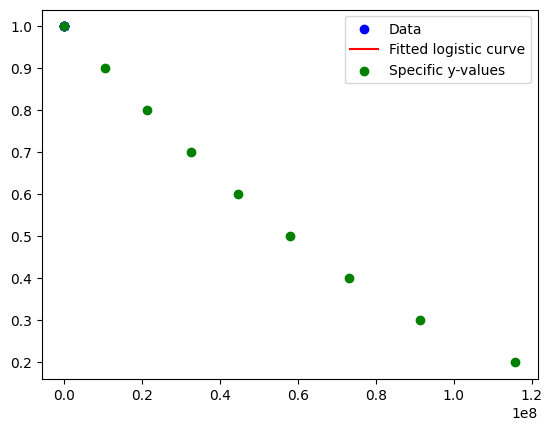

In [61]:
ass = [1.0, 1.0, 0.5]

# Fit the curve
popt, pcov = curve_fit(logiF, allpVals, score, p0=ass)

y_values = np.array([0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# Compute corresponding x-values using the fitted parameters
x_values = inverse_logistic(y_values, *popt)

# Print the results
for y, x in zip(y_values, x_values):
    print(f"x corresponding to y = {y}: {x}")

# Plotting
x_fit = np.arange(0, 1.1, 0.1)  # Adjust this to match your data
y_fit = logiF(x_fit, *popt)

fig, ax = plt.subplots()

ax.scatter(allpVals, score, label='Data', color= 'blue')
ax.plot(x_fit, y_fit, color='red', label='Fitted logistic curve')
ax.scatter(x_values, y_values, color='green', label='Specific y-values')
ax.legend()

plt.show()
fig.savefig(os.path.join(subjPath, 'PBF' + subjNum + '_DataFit.png'))
plt.close()
   
fitVals = pd.Series(x_values)
fitVals.to_csv(os.path.join(subjPath, 'PBF' + subjNum + '_DataFit.csv'))



In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.optimize import curve_fit


In [31]:
def logiF(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

def inverse_logistic(y, L, k, x0):
    return x0 - (1/k) * np.log(L/y - 1)

In [9]:
allRes = pd.read_csv('/Users/barbaragrosjean/Desktop/CHUV/PreddiBrains/Output/Imaging/FA/PBFBGG/FaceI_BGG.csv')

In [28]:
allpVals = np.unique(allRes.Bias.values)
allpVals = [x for x in allpVals if not np.isnan(x)]
allResults = allRes[allRes.StimPresent == 1]
allResults = allResults[allResults.Condition == 1]
score=[]

In [29]:
for i in allpVals:
    thisB = allResults.loc[allResults['Bias'] == i]
    count = sum(thisB['Emotion'].astype(str) =='1')
    subProb = count/len(thisB)
    score.append(subProb)

In [33]:
ass = [1.0, 1.0, 0.5]

# Fit the curve
popt, pcov = curve_fit(logiF, allpVals, score, p0=ass)
y_values = np.arange(0, 11)*0.1
x_values = inverse_logistic(y_values, *popt)

# Print the results
for y, x in zip(y_values, x_values):
    print(f"x corresponding to y = {y}: {x}")

# Plotting
x_fit = np.arange(0, 1.1, 0.1)  # Adjust this to match your data
y_fit = logiF(x_fit, *popt)

x corresponding to y = 0.0: -inf
x corresponding to y = 0.1: -0.02121762450085185
x corresponding to y = 0.2: 0.03468298385446067
x corresponding to y = 0.30000000000000004: 0.07217816774958935
x corresponding to y = 0.4: 0.10328349281136746
x corresponding to y = 0.5: 0.13230447136964277
x corresponding to y = 0.6000000000000001: 0.16204573651519416
x corresponding to y = 0.7000000000000001: 0.19578738413397534
x corresponding to y = 0.8: 0.24035642063885554
x corresponding to y = 0.9: 0.3263669624411447
x corresponding to y = 1.0: nan


/var/folders/rr/sx7rgrrj3p12hz70crvxqcjc0000gn/T/ipykernel_4145/1159640367.py:5: RuntimeWarning: divide by zero encountered in divide
  return x0 - (1/k) * np.log(L/y - 1)
/var/folders/rr/sx7rgrrj3p12hz70crvxqcjc0000gn/T/ipykernel_4145/1159640367.py:5: RuntimeWarning: invalid value encountered in log
  return x0 - (1/k) * np.log(L/y - 1)


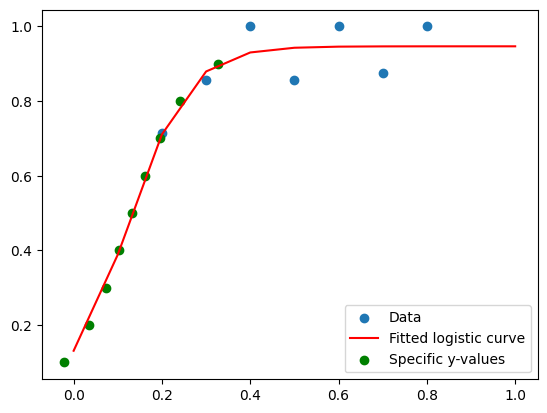

In [37]:
fig, ax = plt.subplots()

ax.scatter(allpVals, score, label='Data')
ax.plot(x_fit, y_fit, color='red', label='Fitted logistic curve')
ax.scatter(x_values, y_values, color='green', label='Specific y-values')
ax.legend()
plt.show()

plt.close()
   
fitVals = pd.Series(x_values)

